## Getting Data

In [1]:
# importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\s_sad\lab-customer-analysis-round-2\files_for_lab\csv_files\marketing_customer_analysis.csv", header = 0, index_col = 0)

## Dealing with data

In [3]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       10910 non-null  object 
 1   State                          10279 non-null  object 
 2   Customer Lifetime Value        10910 non-null  float64
 3   Response                       10279 non-null  object 
 4   Coverage                       10910 non-null  object 
 5   Education                      10910 non-null  object 
 6   Effective To Date              10910 non-null  object 
 7   EmploymentStatus               10910 non-null  object 
 8   Gender                         10910 non-null  object 
 9   Income                         10910 non-null  int64  
 10  Location Code                  10910 non-null  object 
 11  Marital Status                 10910 non-null  object 
 12  Monthly Premium Auto           10910 non-null 

In [4]:
#shape of dataFrame
df.shape

(10910, 25)

#### Change headers names

In [5]:
#Standardize header names
#1. user lower case
df.columns = df.columns.str.lower()

In [6]:
#renaming
df.rename(columns={'customer': 'customer id', 'employmentstatus': 'employment status'}, inplace = True)

In [7]:
#3.removing spaces and adding underscore
df.columns = df.columns.map(lambda x: x.replace(" ","_"))

In [8]:
df.columns

Index(['customer_id', 'state', 'customer_lifetime_value', 'response',
       'coverage', 'education', 'effective_to_date', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

#### Deal with NaN values 

In [9]:
#check and deal with nan
df.isna().sum() # checking NAN

customer_id                         0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [10]:
#Replacing NAN with mode(State,Vehicle_class,Vehicle_size, months_since_last_claim,)
df['state'] = df['state'].fillna(df['state'].mode()[0])
df['vehicle_class'] = df['vehicle_class'].fillna(df['vehicle_class'].mode()[0])
df['vehicle_size'] = df['vehicle_size'].fillna(df['vehicle_size'].mode()[0])
df['months_since_last_claim'] = df['months_since_last_claim'].fillna(df['months_since_last_claim'].mode()[0])

df['state'].isna().sum()
df['vehicle_class'].isna().sum()
df['vehicle_size'].isna().sum()

0

In [11]:
#Replacing NAN with 0( number_of_open_complaints)
df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(0)
df['number_of_open_complaints'].isna().sum()

0

In [12]:
#Replacing NAN with 'unknown' for Response
df['response'] = df['response'].fillna('unknown')

In [13]:
#Removing column name vehicle_type. as we see that nearly half of observations from vehicle_type are missing, therefore it is better to drop this column. 
df = df.drop(columns=['vehicle_type'])

In [14]:
df

,customer_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [15]:
df.isna().sum() # all nans have been removed from data.

customer_id                      0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

### Exploration

In [16]:
#data describtion
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,14.444180,48.091934,0.361962,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,10.187488,27.940675,0.890134,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,5.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,13.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Big difference b/w mean and standard deviation of each variable represents high volatility in dataset.Except months_since_policy_inspection all the variables have high variablity or spread of observations. Except months_since_policy_inception, none of variables have same mean and median, which also confirms that none of them have normal distribution. 

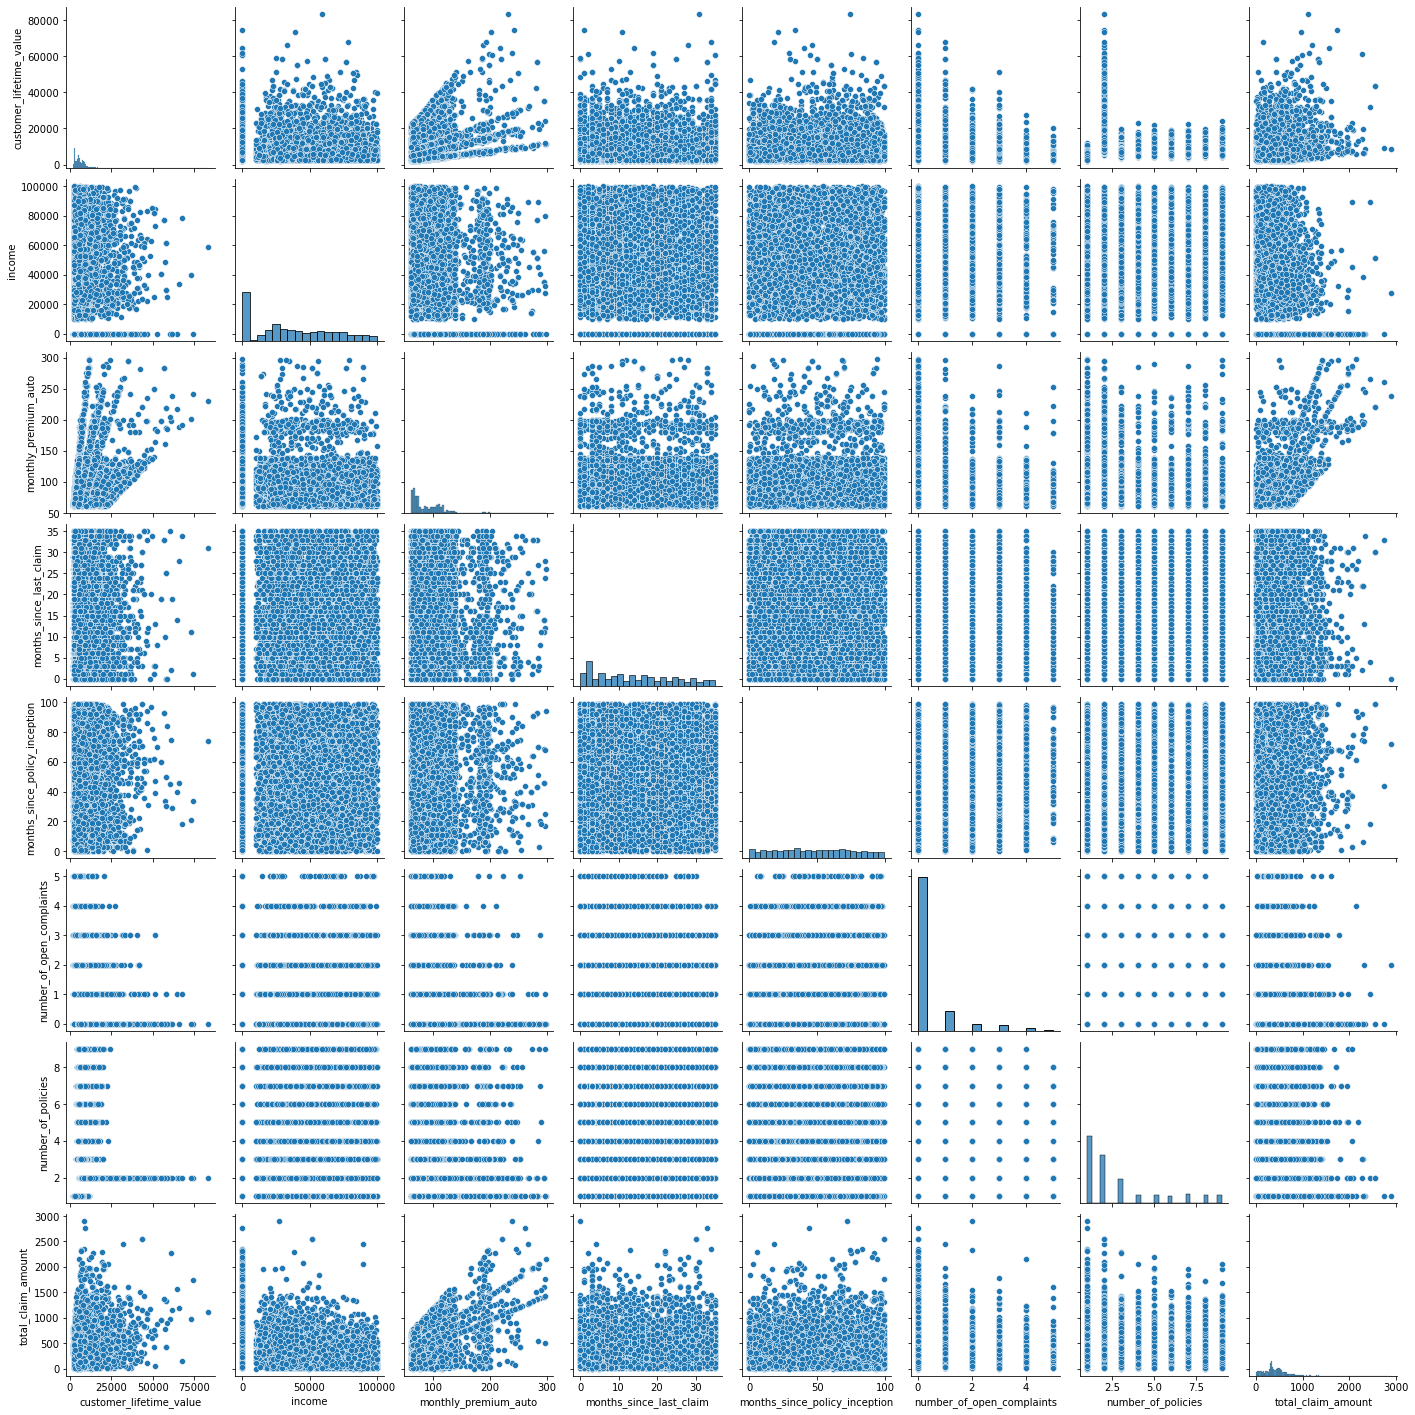

In [17]:
# let us know have a look on bivariate relationship.
sns.pairplot(df)

In [18]:
df_corr = df.corr() # pearson's correlation
df_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.028306,0.403069,0.017062,0.016960,-0.030616,0.016024,0.232626
income,0.028306,1.000000,-0.009788,-0.018053,-0.005903,0.008425,-0.009960,-0.354141
monthly_premium_auto,0.403069,-0.009788,1.000000,0.008043,0.018953,-0.010059,-0.020505,0.631799
months_since_last_claim,0.017062,-0.018053,0.008043,1.000000,-0.036809,0.030285,0.000881,0.008327
months_since_policy_inception,0.016960,-0.005903,0.018953,-0.036809,1.000000,0.004165,-0.009123,0.003095
number_of_open_complaints,-0.030616,0.008425,-0.010059,0.030285,0.004165,1.000000,0.001681,-0.012380
number_of_policies,0.016024,-0.009960,-0.020505,0.000881,-0.009123,0.001681,1.000000,-0.008923
total_claim_amount,0.232626,-0.354141,0.631799,0.008327,0.003095,-0.012380,-0.008923,1.000000


1. correlation coefficients shows that customer lifetime value is strongly positively related with monthly_premium_auto and total claim amount. 
2. Income is strongly inversily related with total_claim_amount.
3.Similarly monthly_premium_auto is strongly positively related with customer lifetime value and total claim amount.
4.months since last claim, months since policy inception, no. of open complaints,no. of policies, does not show any significant relationship with anyother variable.
5. total claim amount have (+)relationship with customer lifetime value and monthly premium auto, (-)ve relationship with income


#### Dealing with multicollinearity 

In [19]:
#def_corr shows that none of variables are strongly related with each other. We assume that for multicollinearity to exist correlation coefficients should be at least greater than 0.8. let us check that.
correlation = df.corr() # pearson correlation
mask = correlation > 0.8
correlation[mask]

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
monthly_premium_auto,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
months_since_last_claim,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
months_since_policy_inception,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
number_of_open_complaints,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
number_of_policies,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
total_claim_amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [20]:
#correlation b/w total_claim_amount and other variables, as total_claim_amount is our target variable.
df_corr['total_claim_amount'].sort_values(ascending = False)

total_claim_amount               1.000000
monthly_premium_auto             0.631799
customer_lifetime_value          0.232626
months_since_last_claim          0.008327
months_since_policy_inception    0.003095
number_of_policies              -0.008923
number_of_open_complaints       -0.012380
income                          -0.354141
Name: total_claim_amount, dtype: float64

income


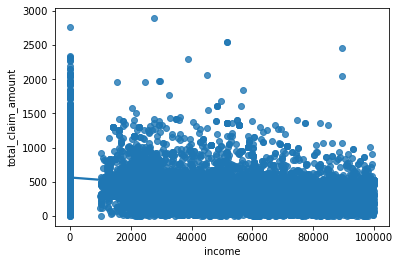

customer_lifetime_value


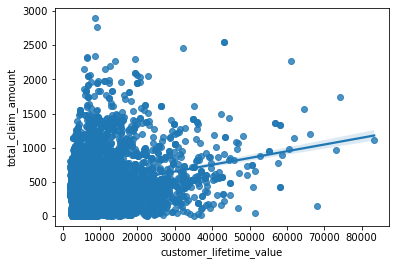

monthly_premium_auto


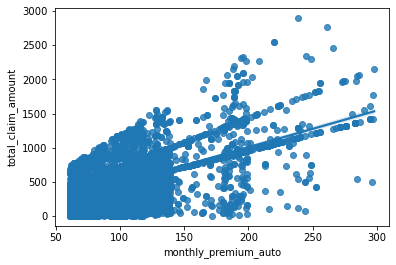

months_since_last_claim


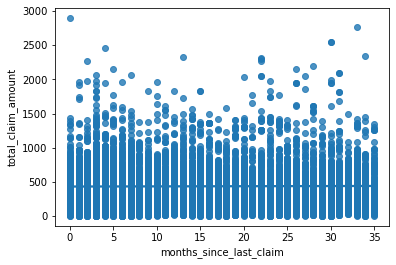

months_since_policy_inception


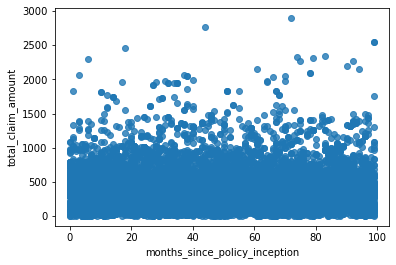

number_of_open_complaints


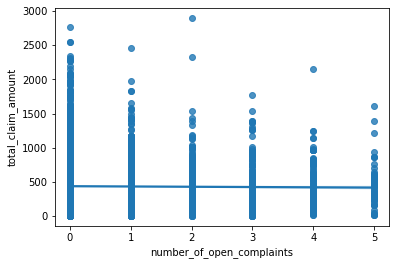

number_of_policies


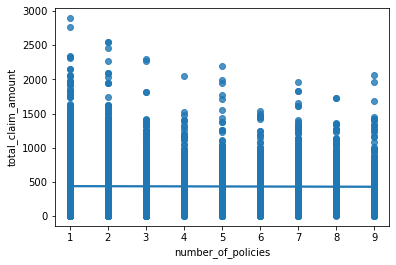

In [21]:
for columns in ['income','customer_lifetime_value','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']:
    print(columns)
    sns.regplot(x=columns,y='total_claim_amount', data = df)
    plt.show()

A horizontal fitted line as observed in months_since_last_claim, months_since_policy_inception, number_of_open_complaints and number_of_polices shows that there is no relationship b/w these variables and total_claim_amount, while customer_lifetime_value and monthly_premium_auto shows slight positive relationship and income and total_claim_amount shows slight negative relationship.As number_of_policies, number_of_open_complaints,months_since_policy_inception, and months_since_last_claim are not showing any kind of relationship with our target variable, therfore we will drop these variables now for further anaylsis.

In [22]:
#removing irrelavant variables from our model. 
df = df.drop(columns=['number_of_policies','number_of_open_complaints','months_since_policy_inception'])

In [23]:
df = df.drop(columns=['months_since_last_claim'])

In [24]:
# now we have been left with 5 numerical columns. 
df.select_dtypes(include=[np.number])

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,4809.216960,48029,61,292.800000
1,2228.525238,0,64,744.924331
2,14947.917300,22139,100,480.000000
3,22332.439460,49078,97,484.013411
4,9025.067525,23675,117,707.925645
...,...,...,...,...
10905,15563.369440,0,253,1214.400000
10906,5259.444853,61146,65,273.018929
10907,23893.304100,39837,201,381.306996
10908,11971.977650,64195,158,618.288849


### Dealing with outliers.

<Figure size 1440x720 with 0 Axes>

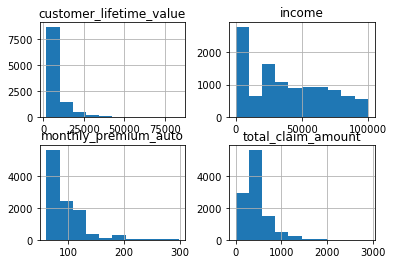

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
df.hist()
plt.show()

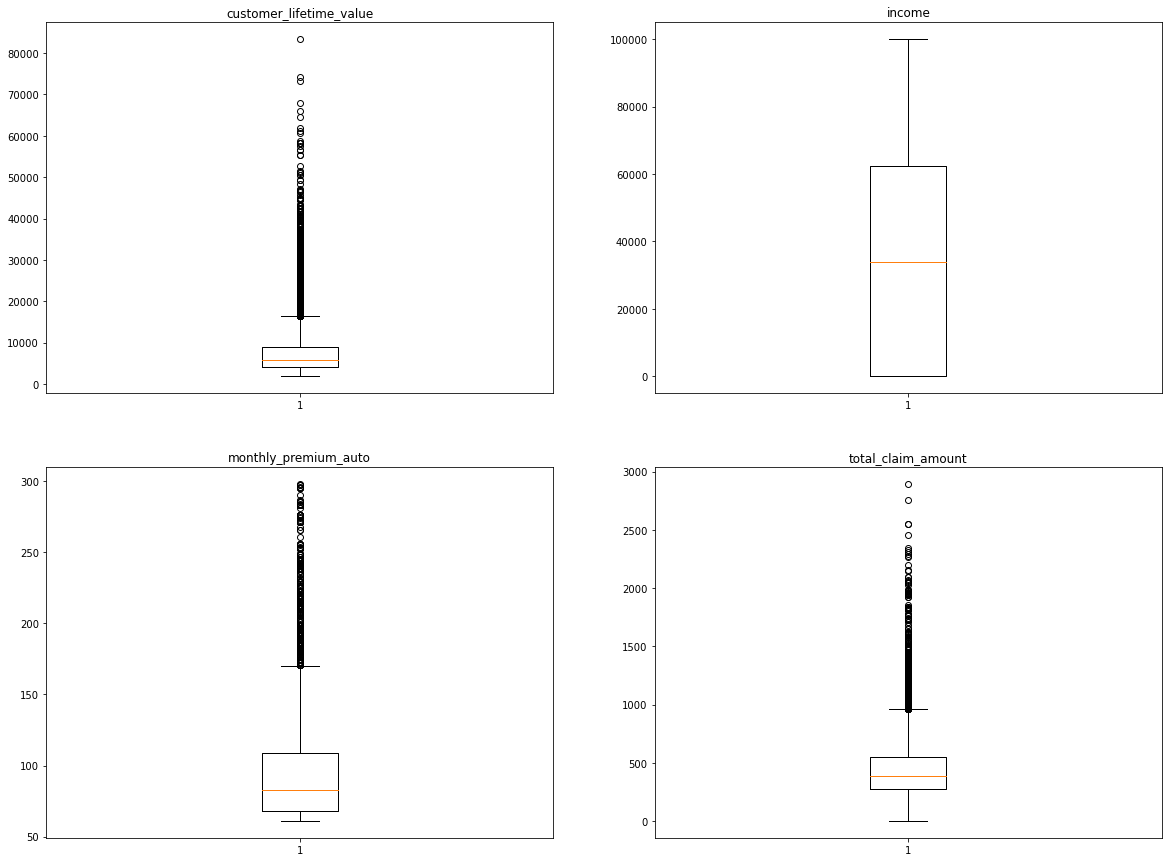

In [26]:
#checking outliers in numerical data
fig, axs = plt.subplots(2, 2, figsize=(20,15))

axs[0, 0].boxplot(df['customer_lifetime_value'])
axs[0, 1].boxplot(df['income'])
axs[1, 0].boxplot(df['monthly_premium_auto'])
axs[1, 1].boxplot(df['total_claim_amount'])


axs[0, 0].title.set_text('customer_lifetime_value')
axs[0, 1].title.set_text('income')
axs[1, 0].title.set_text('monthly_premium_auto')
axs[1, 1].title.set_text('total_claim_amount')

plt.show()

boxplots shows that there are too many outliers in customer_lifetime_value, monthly_premium_auto, and total_claim_amount. 

In [27]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,434.888330
std,6885.081434,30359.195670,34.442532,292.180556
min,1898.007675,0.000000,61.000000,0.099007
25%,4014.453113,0.000000,68.000000,271.082527
50%,5771.147235,33813.500000,83.000000,382.564630
75%,8992.779137,62250.750000,109.000000,547.200000
max,83325.381190,99981.000000,298.000000,2893.239678


In [28]:
#removing outlier with IQR
cols = ['customer_lifetime_value','monthly_premium_auto','total_claim_amount'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [29]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
count,9354.000000,9354.000000,9354.000000,9354.000000
mean,6088.193447,38299.146782,86.087770,382.285441
std,3120.624589,30344.234573,22.009977,203.876065
min,1898.007675,0.000000,61.000000,0.099007
25%,3647.733117,11446.250000,68.000000,253.763981
50%,5332.143288,34783.000000,78.000000,355.200000
75%,8007.386809,62851.000000,104.000000,513.600000
max,16414.044150,99981.000000,170.000000,960.115399


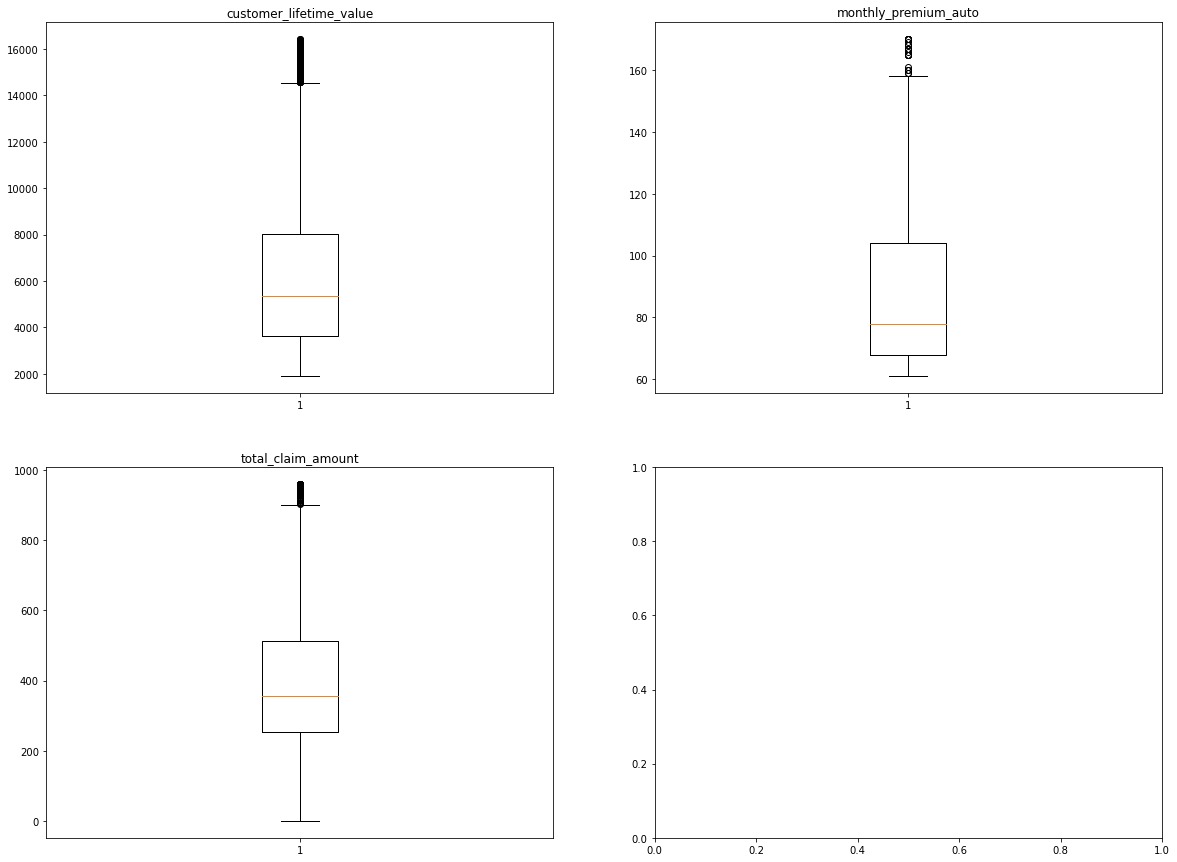

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(20,15))

axs[0, 0].boxplot(df['customer_lifetime_value'])
axs[0, 1].boxplot(df['monthly_premium_auto'])
axs[1, 0].boxplot(df['total_claim_amount'])

axs[0, 0].title.set_text('customer_lifetime_value')
axs[0, 1].title.set_text('monthly_premium_auto')
axs[1, 0].title.set_text('total_claim_amount')

plt.show()

as new box plot shows that outliers have been removed, nearly 15% of observations have been dropped while removing outliers. 

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>]],
      dtype=object)

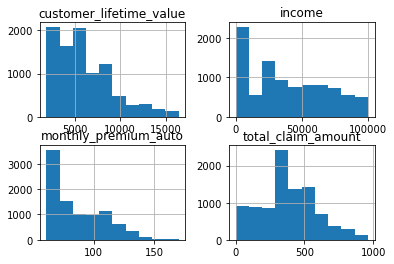

In [31]:
 #histograms of the variables
import matplotlib.pyplot as plt
df.hist()

### x-y split 

In [32]:
df.columns

Index(['customer_id', 'state', 'customer_lifetime_value', 'response',
       'coverage', 'education', 'effective_to_date', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [33]:
#x-y split # x =  explanatory features/variables, y = target vector
#few of explanatory variables has been removed in order to keep the sample small.
x = df.iloc[:,[1,2,3,4,5,7,8,9,12,13,14,16,18,19]]
x

,state,customer_lifetime_value,response,coverage,education,employment_status,gender,income,monthly_premium_auto,policy_type,policy,sales_channel,vehicle_class,vehicle_size
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,61,Corporate Auto,Corporate L3,Agent,Four-Door Car,Medsize
1,California,2228.525238,No,Basic,College,Unemployed,F,0,64,Personal Auto,Personal L3,Call Center,Four-Door Car,Medsize
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,100,Personal Auto,Personal L3,Call Center,SUV,Medsize
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,117,Personal Auto,Personal L2,Branch,Four-Door Car,Medsize
5,California,4745.181764,unknown,Basic,High School or Below,Employed,M,50549,61,Personal Auto,Personal L3,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10901,Washington,4547.892543,No,Premium,Bachelor,Employed,M,33531,116,Personal Auto,Personal L3,Agent,Two-Door Car,Medsize
10902,California,3579.023825,No,Extended,High School or Below,Employed,F,28304,91,Personal Auto,Personal L2,Agent,Four-Door Car,Medsize
10903,Arizona,2771.663013,No,Basic,College,Employed,M,59855,74,Personal Auto,Personal L2,Branch,Two-Door Car,Medsize
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,65,Personal Auto,Personal L3,Branch,Four-Door Car,Medsize


In [34]:
y = df.iloc[:, -3]
y

0        292.800000
1        744.924331
2        480.000000
4        707.925645
5        292.800000
            ...    
10901    801.577478
10902    655.200000
10903    355.200000
10906    273.018929
10908    618.288849
Name: total_claim_amount, Length: 9354, dtype: float64

### Encoding Categorical Data

One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. One-Hot Encoding is the process of creating dummy variables

In [36]:
#dummification
x = pd.get_dummies(x, drop_first = True)
x

,customer_lifetime_value,income,monthly_premium_auto,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,response_unknown,coverage_Extended,...,policy_Special L2,policy_Special L3,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,4809.216960,48029,61,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228.525238,0,64,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,14947.917300,22139,100,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,9025.067525,23675,117,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,4745.181764,50549,61,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10901,4547.892543,33531,116,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
10902,3579.023825,28304,91,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
10903,2771.663013,59855,74,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
10906,5259.444853,61146,65,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### Linear Regression 

#### 1.Train-test split

In [37]:
#Train/Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 0)
x_train


,customer_lifetime_value,income,monthly_premium_auto,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,response_unknown,coverage_Extended,...,policy_Special L2,policy_Special L3,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
6226,4118.588554,69379,103,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
6702,8482.456771,29628,106,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3286,2491.317024,36631,62,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6398,5283.362834,80928,132,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
7971,5399.576180,71186,67,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9221,3861.486269,93272,95,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
10764,6889.557028,0,66,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5665,2540.407726,70125,64,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
3802,3580.261881,75333,90,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [38]:
print("no of rows of x_train = {}".format(len(x_train)))
print("no of rows of x_test = {}".format(len(x_test)))
print("no of rows of y_train ={}".format(len(y_train)))
print("no of rows of y_test={}".format(len(y_test)))

no of rows of x_train = 6547
no of rows of x_test = 2807
no of rows of y_train =6547
no of rows of y_test=2807


In [53]:
# fit and transform train data
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler() # instead of StandardScaler, MinMaxScaler has been used. 

In [40]:
x_train = scaler.fit_transform(x_train)
x_test =  scaler.transform(x_test)
x_train

array([[0.15297432, 0.69406068, 0.3853211 , ..., 0.        , 1.        ,
        0.        ],
       [0.45359827, 0.29639559, 0.41284404, ..., 1.        , 1.        ,
        0.        ],
       [0.04087268, 0.36645292, 0.00917431, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04425451, 0.70152359, 0.02752294, ..., 0.        , 1.        ,
        0.        ],
       [0.11588936, 0.75362391, 0.26605505, ..., 0.        , 1.        ,
        0.        ],
       [0.65219318, 0.84943128, 0.31192661, ..., 1.        , 0.        ,
        1.        ]])

## Modeling
### Apply model


In [41]:
#Creating the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [42]:
regressor.fit(x_train,y_train)

LinearRegression()

In [43]:
regressor.coef_

array([-9.98951564e+00, -1.52735154e+02,  4.34314162e+02, -3.24235413e+00,
       -4.41253635e+00, -1.54574690e+00,  1.59109541e+01,  2.13341666e+01,
       -1.71542287e+01,  4.82197768e+00,  2.73936104e+01, -1.90408674e+00,
       -2.54470799e+01,  3.55057104e+01, -5.22991517e+01, -3.48046651e+01,
        4.03526433e+00,  3.60352670e+01,  5.61331320e+01,  2.53102416e+01,
        2.24669695e+00,  1.10041361e+00, -3.49728508e+00, -1.18921374e+00,
        4.45126246e+00, -3.35271292e-01, -1.86929422e+00,  6.43076484e+00,
       -7.02881166e-01, -4.62747006e+00,  9.84080360e+00,  8.21968871e+00,
        5.20900557e+00,  1.83343637e+01,  3.63469188e+00,  4.03470809e+00,
        7.30904508e+00,  6.78706012e+01])

In [44]:
# Predictions on training set
y_train_pred = regressor.predict(x_train)
y_train_pred

array([390.98614462, 484.31816511, 195.60863823, ..., 169.5368295 ,
       305.49245046, 387.44388306])

In [45]:
# predictions on testing set
y_test_pred = regressor.predict(x_test)
y_test_pred

array([491.85706585, 375.13697033, 207.52611561, ..., 392.56159649,
       378.77825524, 207.7137894 ])

### Model Validation 

### Mean Squared Error

In [46]:
print("Score of Train : {}\n Score of Test : {}".format(regressor.score(x_train,y_train),regressor.score(x_test,y_test)))

Score of Train : 0.40739233107317274
 Score of Test : 0.39361626437533304


In real life cases score of 0.40 is rarely achievable, so we can conclude that model is a good fit. In our case both Training and test Scores are very close to each other, so its neither overfit nor underfit. 

### MSE

In [47]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_train_pred)

24767.36751313291

In [48]:
mean_squared_error(y_test,y_test_pred)

24861.811253394626

### RMSE 

In [49]:
rmse_train = mean_squared_error(y_train,y_train_pred,squared = False)
rmse_train

157.3765151257738

In [50]:
rmse_test = mean_squared_error(y_test,y_test_pred,squared= False)
rmse_test

157.67628627474275

### Mean Absolute Error 

In [51]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,y_train_pred)

121.54585015843965

In [52]:
mean_absolute_error(y_test,y_test_pred)

121.37998355619251

The values of MSE,RMSE and MAE are not very high which shows that predicated data points are not very far away from actual data points,confirming that model is predicting well.